In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(6,4),columns=list("ABCD"))
print(df)


          A         B         C         D
0  0.204531 -0.291197 -0.211107 -1.392585
1  0.015200 -1.594483 -0.091844  2.264804
2  0.557521 -1.208380 -0.423536 -0.650208
3  1.401419  0.468487 -1.515562  0.293106
4 -0.968040  0.471110 -0.599473  0.058095
5 -1.055505  0.979763  0.547608 -1.044934


In [3]:
df.iloc[2:4,2:4] = np.nan
df.iloc[1,0:2] = np.nan
print(df)



          A         B         C         D
0  0.204531 -0.291197 -0.211107 -1.392585
1       NaN       NaN -0.091844  2.264804
2  0.557521 -1.208380       NaN       NaN
3  1.401419  0.468487       NaN       NaN
4 -0.968040  0.471110 -0.599473  0.058095
5 -1.055505  0.979763  0.547608 -1.044934


In [4]:
df.isnull



<bound method DataFrame.isnull of           A         B         C         D
0  0.204531 -0.291197 -0.211107 -1.392585
1       NaN       NaN -0.091844  2.264804
2  0.557521 -1.208380       NaN       NaN
3  1.401419  0.468487       NaN       NaN
4 -0.968040  0.471110 -0.599473  0.058095
5 -1.055505  0.979763  0.547608 -1.044934>

In [7]:
df.fillna({"A":0.5},inplace=True)
print(df["A"])

0    0.204531
1    0.500000
2    0.557521
3    1.401419
4   -0.968040
5   -1.055505
Name: A, dtype: float64


In [14]:
df["B"].fillna(method="bfill",inplace=True)
print(df["B"])




0   -0.291197
1   -1.208380
2   -1.208380
3    0.468487
4    0.471110
5    0.979763
Name: B, dtype: float64


In [15]:
df["C"].fillna(method="ffill",inplace=True)
print(df["C"])



0   -0.211107
1   -0.091844
2   -0.091844
3   -0.091844
4   -0.599473
5    0.547608
Name: C, dtype: float64


In [16]:
df["D"][df["D"].isnull()] = df["D"].mean()
print(df["D"])


0   -1.392585
1    2.264804
2   -0.028655
3   -0.028655
4    0.058095
5   -1.044934
Name: D, dtype: float64


In [17]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']




In [18]:
f = open(r"D:\pyproj\sklearn\data\Iris.csv")
Iris = pd.read_csv(f)
print(Iris.head())



   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


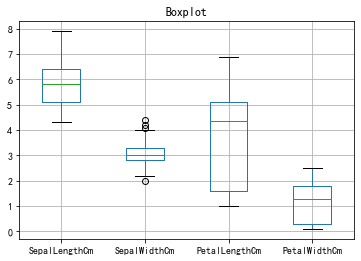

In [19]:
Iris.drop("Id",axis=1).boxplot()
plt.title("Boxplot")
plt.show()


D:\App\Anaconda3\envs\ML-master\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\App\Anaconda3\envs\ML-master\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


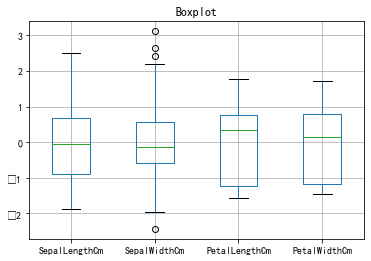

In [20]:
scaler = StandardScaler(with_mean=True,with_std=True)
Iris.iloc[:,1:5] = scaler.fit_transform(Iris.iloc[:,1:5])
Iris.drop("Id",axis=1).boxplot()
plt.title("Boxplot")
plt.show()

In [21]:
le = LabelEncoder()
Species = le.fit_transform(Iris.Species)
print(Species)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(8).reshape(4,2)
print(X)

[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [23]:
pf = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
pf.fit_transform(X)


array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.],
       [ 6.,  7., 36., 42., 49.]])

D:\App\Anaconda3\envs\ML-master\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\App\Anaconda3\envs\ML-master\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


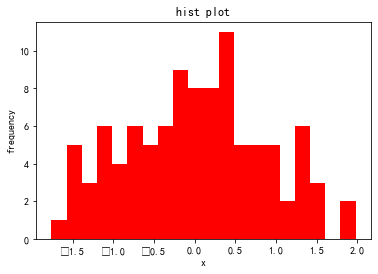

KstestResult(statistic=0.05077007023936682, pvalue=0.9471873722550075)

In [24]:
from scipy import stats
np.random.seed(19)
x = stats.norm.rvs(size=100)
plt.figure()
plt.hist(x,bins=20,color="red")
plt.xlabel("x")
plt.ylabel("frequency")
plt.title("hist plot")
plt.show()
stats.kstest(x,'norm')

D:\App\Anaconda3\envs\ML-master\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\App\Anaconda3\envs\ML-master\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


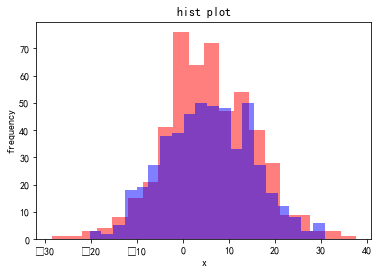

Ttest_indResult(statistic=0.3053485810057385, pvalue=0.7601643521793153)

In [25]:
np.random.seed(125)
x1 = stats.norm.rvs(loc=5,scale=10,size=500)
x2 = stats.norm.rvs(loc=5,scale=10,size=500)
plt.figure()
plt.hist(x1,bins=20,color="red",alpha = 0.5)
plt.hist(x2,bins=20,color="blue",alpha=0.5)
plt.xlabel("x")
plt.ylabel("frequency")
plt.title("hist plot")
plt.show()
stats.ttest_ind(x1,x2)


In [26]:
import seaborn as sns
Iris = sns.load_dataset("iris")
print(Iris)


     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
